![image](images/lr1.png)

![image](images/lr2.png)

![image](images/lr3.png)

![image](images/lr4.png)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
! pip install ISLP


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from ISLP import load_data
df = load_data('Default')
df.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [5]:
df.shape

(10000, 4)

In [6]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [7]:
df["student"].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [8]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


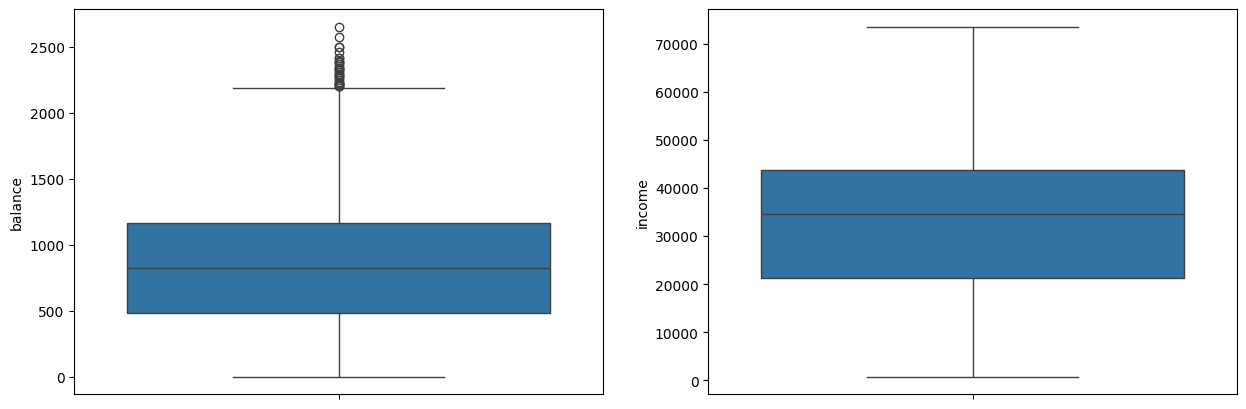

In [9]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y = df["balance"])

plt.subplot(1, 2, 2)
sns.boxplot(y = df["income"])
plt.show()

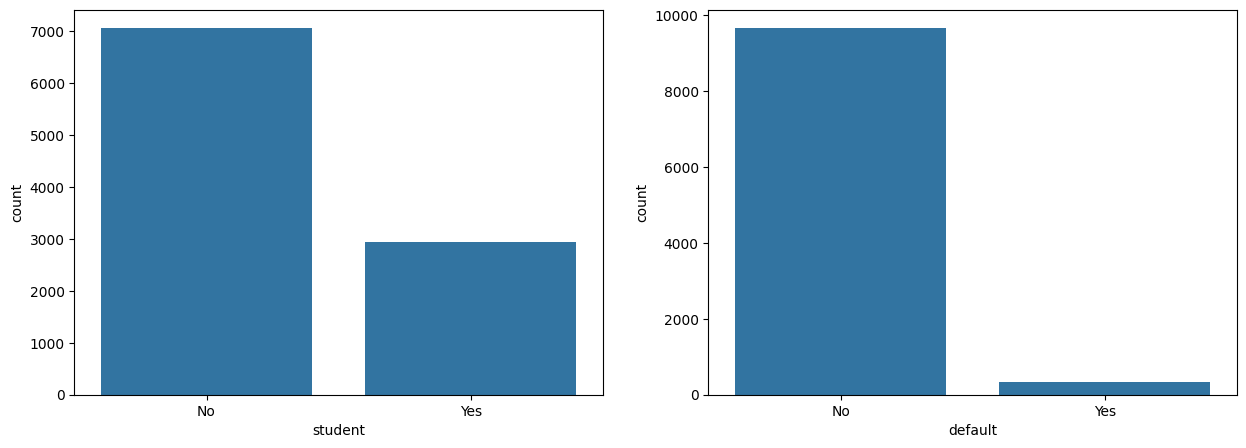

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x="student", data=df)

plt.subplot(1, 2, 2)
sns.countplot(x="default", data=df)

plt.show()

In [11]:
df["student"].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [12]:
df["default"].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [13]:
df["student"].value_counts(normalize = True)

student
No     0.7056
Yes    0.2944
Name: proportion, dtype: float64

In [14]:
df["default"].value_counts(normalize = True)

default
No     0.9667
Yes    0.0333
Name: proportion, dtype: float64

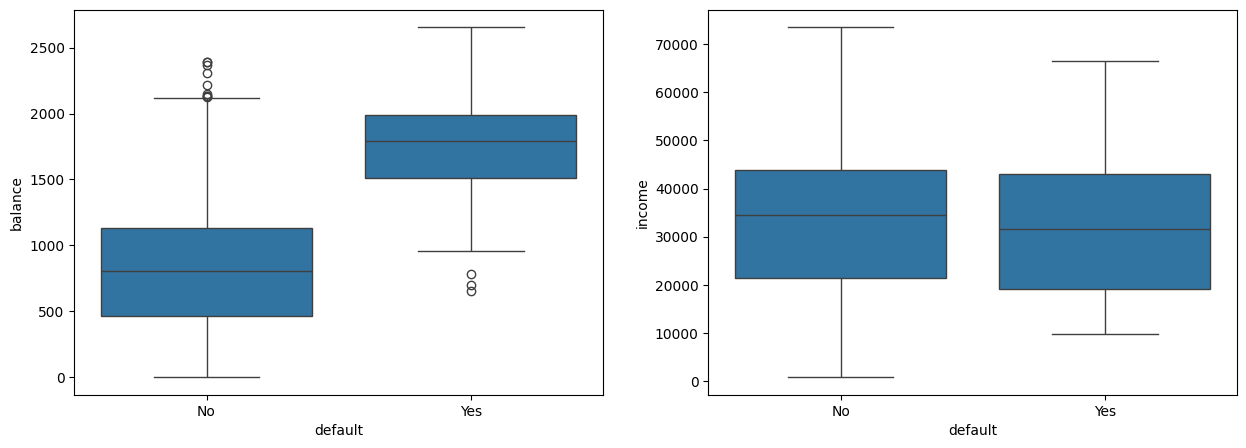

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="default", y="balance", data=df)

plt.subplot(1, 2, 2)
sns.boxplot(x="default", y="income", data=df)

plt.show()

In [16]:
pd.crosstab(df["student"], df["default"], normalize="index").round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


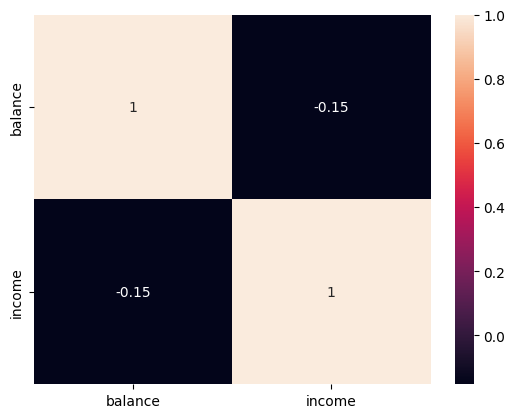

In [17]:
sns.heatmap(df[["balance", "income"]].corr(), annot = True)
plt.show()

In [18]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [19]:
Q1, Q3 = df["balance"].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5 * (IQR)
UL = Q3 + 1.5 * (IQR)

In [20]:
UL

2193.1743086078177

In [21]:
df1 = df[df["balance"] > UL]
df1

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.492253
1136,Yes,No,2499.016750,51504.293960
1160,Yes,Yes,2502.684931,14947.519752
1359,Yes,No,2220.966201,40725.096207
1502,Yes,Yes,2332.878254,11770.234124
1609,Yes,Yes,2269.946966,18021.105948
2096,Yes,Yes,2261.848162,20030.165119
2140,No,Yes,2308.893236,19110.266412
2929,Yes,Yes,2387.314867,28296.914718
3162,Yes,Yes,2415.316994,17429.503375


In [22]:
df1["default"].count()

np.int64(31)

In [23]:
df1["default"].value_counts(normalize = True)

default
Yes    0.83871
No     0.16129
Name: proportion, dtype: float64

In [24]:
df1["default"].value_counts()

default
Yes    26
No      5
Name: count, dtype: int64

In [25]:
df["balance"] = np.where(df["balance"] > UL, UL, df["balance"])

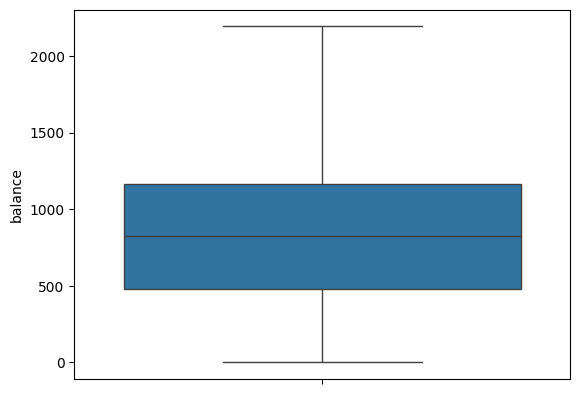

In [26]:
sns.boxplot(y = df["balance"])
plt.show()

In [27]:
df = pd.get_dummies(df, drop_first=True)

In [28]:
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


In [29]:
df.columns = ["balance", "income", "default", "student"]

In [30]:
df.head()

,balance,income,default,student
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


In [31]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop("default", axis = 1)
y = df["default"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

In [37]:
print(X_train.shape)
print(X_test.shape)

(7000, 3)
(3000, 3)


In [38]:
print(y_train.value_counts(normalize=True).round(2))
print(' ')
print(y_test.value_counts(normalize=True).round(2))

default
False    0.97
True     0.03
Name: proportion, dtype: float64
 
default
False    0.97
True     0.03
Name: proportion, dtype: float64


In [39]:
! pip install imblearn


   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ---------------------------------------- 3/3 [imblearn]




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from imblearn.over_sampling import SMOTE

In [42]:
sm = SMOTE(random_state=33, sampling_strategy=0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()

In [45]:
lr.fit(X_res, y_res)

LogisticRegression()

In [46]:
y_pred = lr.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
confusion_matrix(y_test, y_pred)

array([[2625,  275],
       [  17,   83]])

In [49]:
(2625+83)/(2625+83+275+17)

0.9026666666666666